In [1]:
# for now, just request a random composite spectrum from facula_and_spot_creator
# and try to decompose it - aka can we regenerate the w's

# eventually can read in external data or some training data from a large hdf5 file etc

from itertools import product
from pathlib import Path
import astropy
from astropy.table import QTable
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy as sp
from astropy.visualization import quantity_support
quantity_support()
from tqdm import tqdm
import astropy.units as u
from scipy.interpolate import interp1d
from astropy.units import Quantity
from joblib import Parallel, delayed
import os

from spots_and_faculae_model.spectrum import spectrum
from spots_and_faculae_model.readers import read_JWST_fits
from spots_and_faculae_model.new_spectrum_grid import new_spectrum_grid, TEFF_COLUMN, LOGG_COLUMN, FLUX_COLUMN, FEH_COLUMN

if __name__ == "__main__":
	# path of the spectrum to be analysed
	# external_spectrum_path = Path("../../assets/MAST_2025-10-26T19_44_50.934Z - TRAPPIST-1/MAST_2025-10-26T19_44_50.934Z/JWST/jw02589001001_04101_00001-seg001_nis_x1dints.fits")
	external_spectrum_path = Path("../../assets/MAST_2025-10-26T11_57_04.058Z - LTT/MAST_2025-10-26T11_57_04.058Z/JWST/jw03557004001_04101_00001-seg001_nis_x1dints.fits")
	script_dir = os.getcwd()  # usually the folder where notebook is running")
	wavelength_grid_absolute_path = (script_dir / external_spectrum_path).resolve()

	spectrum_to_decompose : spectrum = read_JWST_fits(wavelength_grid_absolute_path)
	
	mask = np.isfinite(spectrum_to_decompose.Fluxes)

	spectrum_to_decompose = spectrum_to_decompose[mask]
	print("normalising counts")
	spectrum_to_decompose.normalise_Janskys()
	print("finished normalising counts")

	print("reading in hdf5")
	spectral_grid_relative_path = Path("../../assets/spectral_grid.hdf5")
	spectral_grid_absolute_path = (script_dir / spectral_grid_relative_path).resolve()
	spec_grid : new_spectrum_grid = new_spectrum_grid.from_hdf5_file(absolute_hdf5_path=spectral_grid_absolute_path)
	print(spec_grid.Table)
	print("finished reading in hdf5")
	
	A = np.empty((0, 0))

	# this is slow but gives us all the parameters saved to the spectral grid
	# T_effs = T_effs[(2300 *u.K <= T_effs) & (T_effs <= 3000*u.K)]
	
	# from the grid, fluxes converted to janskys
	normalised_and_converted_spectral_components = Parallel(n_jobs=-1, prefer="threads")(
		delayed(spec_grid.process_single_spectral_component)(T_eff, FeH, log_g, mask=mask, spectrum_to_decompose=spectrum_to_decompose) for T_eff, FeH, log_g in tqdm(product(spec_grid.T_effs, spec_grid.FeHs, spec_grid.log_gs), total=len(spec_grid.T_effs) * len(spec_grid.FeHs) * len(spec_grid.log_gs), desc="Appending values to A matrix...")
		)
	
	# spectrum_to_decompose = spectrum_to_decompose[(1.25 * u.um <= spectrum_to_decompose.Wavelengths) & (spectrum_to_decompose.Wavelengths <= 2 * u.um)]

	A = np.column_stack(normalised_and_converted_spectral_components)

normalising counts
finished normalising counts
reading in hdf5


Creating fancier spectral grid...:   0%|          | 0/2106 [00:00<?, ?it/s]/home/bengreen/University/Part III/stellar-heterogeneity-modelling/spots_and_faculae_model/src/spots_and_faculae_model/new_spectrum_grid.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.FancyTable = pd.concat([self.FancyTable, new_row])
Creating fancier spectral grid...:   1%|          | 11/2106 [00:00<00:41, 50.43it/s]

2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K


Creating fancier spectral grid...:   1%|          | 17/2106 [00:00<00:43, 47.72it/s]

2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K


Creating fancier spectral grid...:   1%|▏         | 28/2106 [00:00<00:42, 48.53it/s]

2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K


Creating fancier spectral grid...:   2%|▏         | 40/2106 [00:00<00:41, 49.56it/s]

2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K


Creating fancier spectral grid...:   2%|▏         | 52/2106 [00:01<00:40, 50.33it/s]

2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K


Creating fancier spectral grid...:   3%|▎         | 64/2106 [00:01<00:40, 50.56it/s]

2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K


Creating fancier spectral grid...:   3%|▎         | 70/2106 [00:01<00:40, 50.33it/s]

2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K


Creating fancier spectral grid...:   4%|▍         | 82/2106 [00:01<00:40, 50.00it/s]

2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K


Creating fancier spectral grid...:   4%|▍         | 94/2106 [00:01<00:39, 50.49it/s]

2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K


Creating fancier spectral grid...:   5%|▍         | 105/2106 [00:02<00:41, 48.60it/s]

2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K


Creating fancier spectral grid...:   5%|▌         | 115/2106 [00:02<00:40, 49.11it/s]

2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2300.0 K
2400.0 K


Creating fancier spectral grid...:   6%|▌         | 125/2106 [00:02<00:40, 48.92it/s]

2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K


Creating fancier spectral grid...:   6%|▋         | 135/2106 [00:02<00:40, 49.20it/s]

2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K


Creating fancier spectral grid...:   7%|▋         | 145/2106 [00:02<00:40, 48.65it/s]

2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K


Creating fancier spectral grid...:   7%|▋         | 156/2106 [00:03<00:39, 49.23it/s]

2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K


Creating fancier spectral grid...:   8%|▊         | 168/2106 [00:03<00:38, 49.77it/s]

2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K


Creating fancier spectral grid...:   8%|▊         | 178/2106 [00:03<00:38, 49.66it/s]

2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K


Creating fancier spectral grid...:   9%|▉         | 188/2106 [00:03<00:39, 48.30it/s]

2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K


Creating fancier spectral grid...:   9%|▉         | 199/2106 [00:04<00:39, 48.89it/s]

2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K


Creating fancier spectral grid...:  10%|▉         | 210/2106 [00:04<00:38, 49.32it/s]

2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K


Creating fancier spectral grid...:  10%|█         | 221/2106 [00:04<00:38, 49.52it/s]

2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K


Creating fancier spectral grid...:  11%|█         | 232/2106 [00:04<00:38, 49.27it/s]

2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2400.0 K
2500.0 K
2500.0 K


Creating fancier spectral grid...:  12%|█▏        | 243/2106 [00:04<00:38, 48.79it/s]

2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K


Creating fancier spectral grid...:  12%|█▏        | 254/2106 [00:05<00:37, 48.88it/s]

2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K


Creating fancier spectral grid...:  13%|█▎        | 264/2106 [00:05<00:39, 46.78it/s]

2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K


Creating fancier spectral grid...:  13%|█▎        | 274/2106 [00:05<00:38, 47.31it/s]

2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K


Creating fancier spectral grid...:  14%|█▎        | 285/2106 [00:05<00:37, 48.14it/s]

2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K


Creating fancier spectral grid...:  14%|█▍        | 295/2106 [00:06<00:37, 48.66it/s]

2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K


Creating fancier spectral grid...:  15%|█▍        | 306/2106 [00:06<00:36, 49.44it/s]

2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K


Creating fancier spectral grid...:  15%|█▍        | 313/2106 [00:06<00:36, 49.03it/s]


2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K
2500.0 K


KeyboardInterrupt: 

In [ ]:
print(spec_grid.FancyTable)

Empty DataFrame
Columns: [T_eff / K, Fe/H / relative to solar, log_g / log(cm s^(-2)), spectrum object]
Index: []


In [ ]:
print("minimising")
# assume that w \in [0,1] : but I think this will only be true for real data if normalisation has been done correctly (???)
result = sp.optimize.lsq_linear(A, [i.value for i in spectrum_to_decompose.Fluxes], bounds = (0, 1), verbose = 2)#, max_iter=600, tol=1e-10, lsmr_tol=1e-5)
print(result)
print(f"sum of weights={np.sum(result.x)}")

minimising
   Iteration        Cost      Cost reduction    Step norm     Optimality   
       0         2.7428e+09                                    6.60e+06    
       1         6.8497e+08      2.06e+09       1.30e+01       1.65e+06    
       2         1.7088e+08      5.14e+08       6.51e+00       4.12e+05    
       3         4.2539e+07      1.28e+08       3.25e+00       1.03e+05    
       4         1.0544e+07      3.20e+07       1.63e+00       2.58e+04    
       5         2.5915e+06      7.95e+06       8.13e-01       6.44e+03    
       6         6.2605e+05      1.97e+06       4.07e-01       1.61e+03    
       7         1.4606e+05      4.80e+05       2.03e-01       4.02e+02    
       8         3.1735e+04      1.14e+05       1.01e-01       1.00e+02    
       9         5.9428e+03      2.58e+04       5.02e-02       2.46e+01    
      10         8.1062e+02      5.13e+03       2.42e-02       5.74e+00    
      11         6.0755e+01      7.50e+02       1.05e-02       1.12e+00    
 

In [ ]:
%matplotlib widget

/tmp/ipykernel_4319/1812527771.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hash_map = pd.concat([hash_map, pd.DataFrame([new_row])], ignore_index=True)


     T_eff / K  Fe/H / relative to solar  log_g / log(cm s^(-2))  weight
1624  3600.0 K                       0.5                     6.0   0.558
2014  4000.0 K                      -3.0                     6.0   0.119
2053  4000.0 K                      -1.0                     6.0   0.102
1989  4000.0 K                      -4.0                     0.0   0.096
1164  3200.0 K                       1.0                     3.5   0.061
67    2300.0 K                      -0.5                     1.0   0.035
425   2600.0 K                      -0.5                     4.5   0.031
521   2700.0 K                      -1.0                     0.5   0.022
769   2900.0 K                      -0.5                     1.0   0.016
350   2500.0 K                       1.0                     6.0   0.006


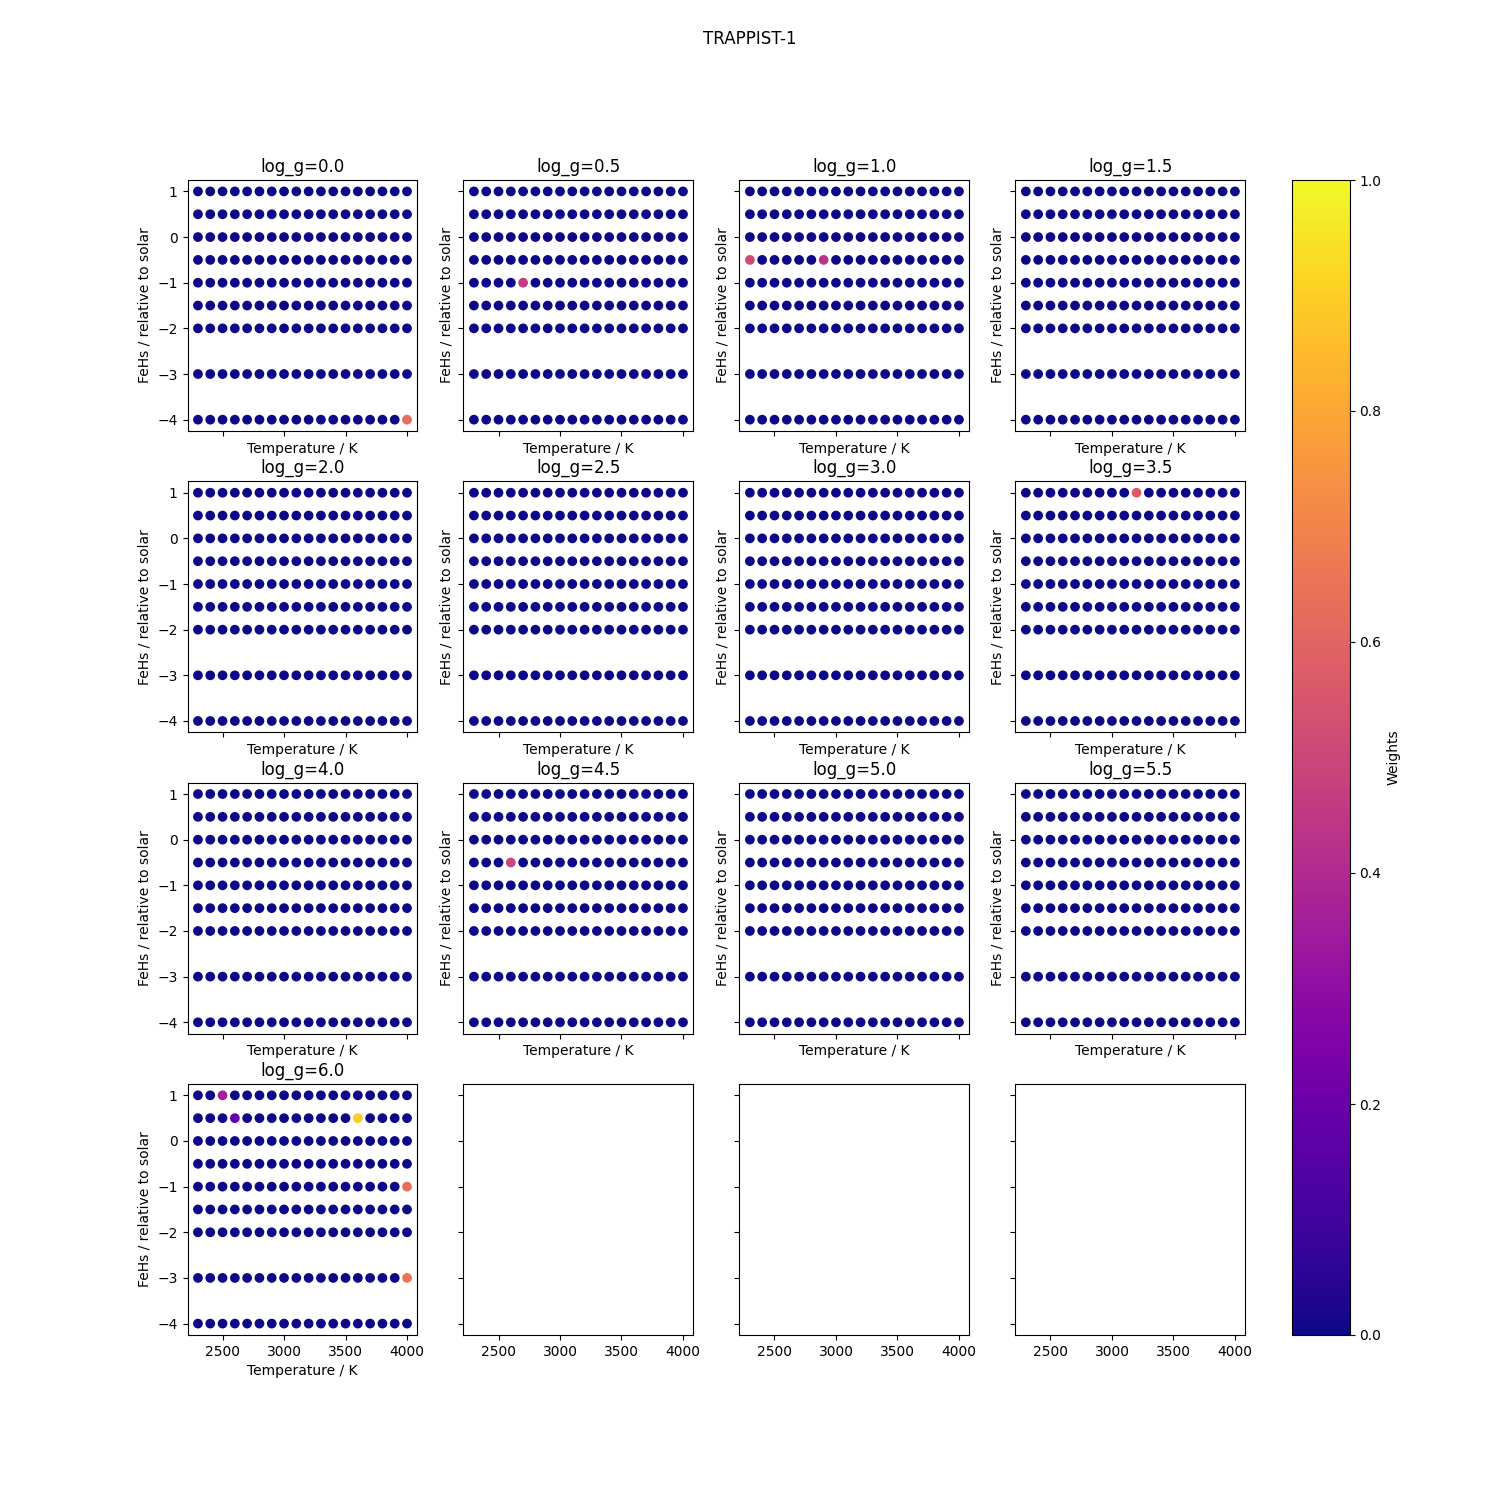

Jy
Jy


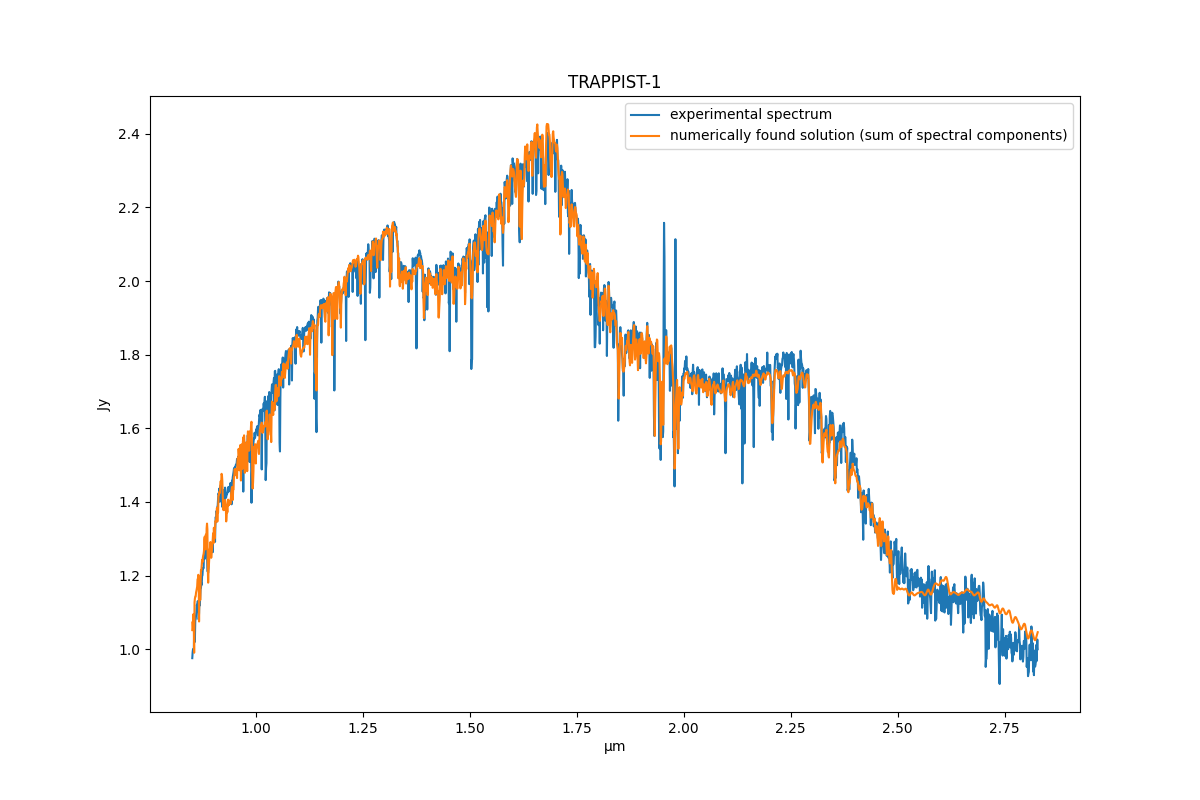

In [ ]:

# # # plot some data # # #

result_map = {}
i = 0
for T_eff, FeH, log_g in product(spec_grid.T_effs, spec_grid.FeHs, spec_grid.log_gs):
    key = (T_eff, FeH, log_g)
    result_map[key] = i
    i += 1

WEIGHT_COLUMN : str = "weight"

hash_map = pd.DataFrame(columns=[TEFF_COLUMN, FEH_COLUMN, LOGG_COLUMN, WEIGHT_COLUMN])

for T_eff, FeH, log_g in product(spec_grid.T_effs, spec_grid.FeHs, spec_grid.log_gs):
    new_row = {TEFF_COLUMN: T_eff, FEH_COLUMN: FeH, LOGG_COLUMN: log_g, WEIGHT_COLUMN: result.x[result_map[(T_eff, FeH, log_g)]]}
    hash_map = pd.concat([hash_map, pd.DataFrame([new_row])], ignore_index=True)

print(hash_map.sort_values(WEIGHT_COLUMN, ascending=False).head(10).round(3))

fig, axes = plt.subplots(4, 4, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.ravel()
for i, log_g in enumerate(spec_grid.log_gs):
    subset = hash_map[hash_map[LOGG_COLUMN] == log_g]
    x_vals = [a.value for a in subset[TEFF_COLUMN]]
    y_vals = subset[FEH_COLUMN]
    z_vals = subset[WEIGHT_COLUMN]

    sc = axes[i].scatter(x_vals, y_vals, c=z_vals**.2, cmap='plasma', vmin=0, vmax=1)

    axes[i].set_title(f"log_g={log_g}")
    axes[i].set_xlabel("Temperature / K")
    axes[i].set_ylabel("FeHs / relative to solar")
    # axes[i].set_xticks(np.arange(np.min(T_effs) / u.K, np.max(T_effs) / u.K + 1, 50) * u.K)
    # axes[i].grid()

STAR_NAME : str = "TRAPPIST-1"
cbar = fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.05, pad=0.04)
cbar.set_label("Weights")
fig.suptitle(STAR_NAME)
plt.show()

plt.figure(figsize=(12,8))
plt.title(STAR_NAME)
print(spectrum_to_decompose.Fluxes[0].unit)
print(A[0][0].unit)
determined_spectrum = spectrum(spectrum_to_decompose.Wavelengths, A @ result.x)
# determined_spectrum.normalise_Janskys()
plt.plot(spectrum_to_decompose.Wavelengths, spectrum_to_decompose.Fluxes, label="experimental spectrum")
plt.plot(determined_spectrum.Wavelengths, determined_spectrum.Fluxes, label="numerically found solution (sum of spectral components)")

plt.legend()
plt.show()